In [12]:
# import packages
import os
import scipy.io as sio
import matlab.engine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Generate Data with MATLAB

In [15]:
# connect matlab engine to the existing matlab session
eng = matlab.engine.connect_matlab()
eng.cd(r'C:\Users\ishparii\dev\SkyFall_GLM', nargout=0)
eng.ls(nargout=0)

In [16]:
# run matlab script to put data together
data_CF = eng.TrainingDataSetup([],[],1,0) #location -use all; subjID - use all; n jitter - 1; condition - healthy

In [17]:
data_CF_np = np.array(data_CF)
data_CF_df = pd.DataFrame(data_CF_np)

print(data_CF_df.shape)
data_CF_df.head()


(650, 1215)


,0,1,2,3,4,5,6,7,8,9,...,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214
0,1.0,1.0,1.0,3.0,0.132226,0.074660,-0.118888,0.012579,0.049360,0.051680,...,2.235428,4.997699,0.721928,0.787661,0.053909,0.085895,0.071485,0.090722,0.046334,0.127110
1,1.0,1.0,1.0,3.0,-0.077828,0.070436,-0.217299,-0.028075,0.042425,0.076308,...,2.235353,4.997421,0.721928,0.804926,0.055249,0.092283,0.096109,0.103435,0.095055,0.080526
2,1.0,1.0,1.0,3.0,-0.006114,0.034498,-0.206166,-0.025551,0.034052,0.071821,...,2.231253,4.982409,1.370951,0.817524,0.055180,0.096682,0.093441,0.077564,0.101474,0.067335
3,1.0,1.0,1.0,4.0,-0.154483,0.024149,0.316410,-0.031890,0.042762,0.069643,...,2.235787,4.998989,0.721928,0.516624,0.039205,0.099017,0.071918,0.094359,0.072023,0.086206
4,1.0,1.0,1.0,4.0,-0.163624,0.023899,0.322660,-0.042376,0.007777,0.056139,...,2.235998,4.999749,0.721928,0.685685,0.048051,0.093172,0.083448,0.118911,0.063367,0.049815


In [18]:
# location: 0 - N/A; 1 - pouch; 2 - pocket; 3 - hand
# subj_code: 0 - amputee; 1 - healthy
# label: 1 - slip; 2 - trip; 3 - right; 4 - left
data_CF_df=data_CF_df.rename(columns = {0:'subj_id', 1:'location', 2:'subj_code', 3:'label'})

# save data to file
data_CF_df.to_csv('data_CF_10sec.csv')

data_CF_df.head()

,subj_id,location,subj_code,label,4,5,6,7,8,9,...,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214
0,1.0,1.0,1.0,3.0,0.132226,0.074660,-0.118888,0.012579,0.049360,0.051680,...,2.235428,4.997699,0.721928,0.787661,0.053909,0.085895,0.071485,0.090722,0.046334,0.127110
1,1.0,1.0,1.0,3.0,-0.077828,0.070436,-0.217299,-0.028075,0.042425,0.076308,...,2.235353,4.997421,0.721928,0.804926,0.055249,0.092283,0.096109,0.103435,0.095055,0.080526
2,1.0,1.0,1.0,3.0,-0.006114,0.034498,-0.206166,-0.025551,0.034052,0.071821,...,2.231253,4.982409,1.370951,0.817524,0.055180,0.096682,0.093441,0.077564,0.101474,0.067335
3,1.0,1.0,1.0,4.0,-0.154483,0.024149,0.316410,-0.031890,0.042762,0.069643,...,2.235787,4.998989,0.721928,0.516624,0.039205,0.099017,0.071918,0.094359,0.072023,0.086206
4,1.0,1.0,1.0,4.0,-0.163624,0.023899,0.322660,-0.042376,0.007777,0.056139,...,2.235998,4.999749,0.721928,0.685685,0.048051,0.093172,0.083448,0.118911,0.063367,0.049815


In [19]:
data_AF = eng.TrainingDataSetup([],[],1,1) #location -use all; subjID - use all; n jitter - 1; condition - amputees
# data_AF

In [20]:
data_AF_np = np.array(data_AF)
data_AF_df = pd.DataFrame(data_AF_np)

print(data_AF_df.shape)
data_AF_df.head()

(495, 1215)


,0,1,2,3,4,5,6,7,8,9,...,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214
0,3.0,1.0,0.0,3.0,-0.294355,-0.463993,-0.127688,-0.018617,-0.188849,-0.048380,...,2.218388,4.934733,1.370951,0.039994,0.404270,0.132761,0.115437,1.319767,0.176988,0.242063
1,3.0,1.0,0.0,3.0,-0.380459,-0.552352,-0.172389,-0.013745,-0.159367,-0.036240,...,0.717063,-2.702712,1.370951,0.819159,0.044564,0.059319,0.094200,0.043299,0.101479,0.082715
2,3.0,1.0,0.0,3.0,-0.448509,-0.503266,-0.089075,-0.011493,-0.167085,-0.031274,...,2.211177,4.906145,1.370951,0.096272,0.531889,0.218618,0.189642,2.667211,0.100258,0.137136
3,3.0,1.0,0.0,4.0,0.598852,0.202159,-0.218131,-0.005727,-0.054691,-0.065409,...,2.235712,4.998730,0.721928,0.797221,0.088376,0.146912,0.108771,0.188578,0.156980,0.162251
4,3.0,1.0,0.0,4.0,0.416110,0.042183,-0.177830,-0.008599,-0.141454,-0.050355,...,2.235759,4.998889,0.721928,0.799086,0.069129,0.082523,0.119970,0.166548,0.176009,0.081968


In [21]:
# location: 0 - N/A; 1 - pouch; 2 - pocket; 3 - hand
# subj_code: 0 - amputee; 1 - healthy
# label: 1 - slip; 2 - trip; 3 - right; 4 - left
data_AF_df=data_AF_df.rename(columns = {0:'subj_id', 1:'location', 2:'subj_code', 3:'label'})

# save data to file
data_AF_df.to_csv('data_AF_10sec.csv')

data_AF_df.head()

,subj_id,location,subj_code,label,4,5,6,7,8,9,...,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214
0,3.0,1.0,0.0,3.0,-0.294355,-0.463993,-0.127688,-0.018617,-0.188849,-0.048380,...,2.218388,4.934733,1.370951,0.039994,0.404270,0.132761,0.115437,1.319767,0.176988,0.242063
1,3.0,1.0,0.0,3.0,-0.380459,-0.552352,-0.172389,-0.013745,-0.159367,-0.036240,...,0.717063,-2.702712,1.370951,0.819159,0.044564,0.059319,0.094200,0.043299,0.101479,0.082715
2,3.0,1.0,0.0,3.0,-0.448509,-0.503266,-0.089075,-0.011493,-0.167085,-0.031274,...,2.211177,4.906145,1.370951,0.096272,0.531889,0.218618,0.189642,2.667211,0.100258,0.137136
3,3.0,1.0,0.0,4.0,0.598852,0.202159,-0.218131,-0.005727,-0.054691,-0.065409,...,2.235712,4.998730,0.721928,0.797221,0.088376,0.146912,0.108771,0.188578,0.156980,0.162251
4,3.0,1.0,0.0,4.0,0.416110,0.042183,-0.177830,-0.008599,-0.141454,-0.050355,...,2.235759,4.998889,0.721928,0.799086,0.069129,0.082523,0.119970,0.166548,0.176009,0.081968


# Read Data from CSV

In [10]:
# read data from csv files
data_CF_df = pd.read_csv('data_CF_10sec.csv', index_col=0)
data_CF_df.head()

data_AF_df = pd.read_csv('data_AF_10sec.csv', index_col=0)

print('Healthy data size: ', data_CF_df.shape)
print('Amputee data size: ', data_AF_df.shape)

data_AF_df.head()

Healthy data size:  (2602, 1215)
Amputee data size:  (1601, 1215)


,subj_id,location,subj_code,label,4,5,6,7,8,9,...,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214
0,1.0,3.0,0.0,9.0,0.152234,-0.431253,0.009568,-0.032451,-0.210494,-0.051874,...,2.077791,4.355384,1.370951,-0.006816,0.026533,0.054728,0.062460,0.060200,0.048826,0.044500
1,1.0,3.0,0.0,9.0,-0.013777,-0.165121,-0.049645,-0.011921,-0.164886,-0.049621,...,-0.017431,-2.426575,2.321928,-0.725191,0.029039,0.082529,0.041031,0.061260,0.050184,0.049987
2,1.0,3.0,0.0,9.0,-0.018117,-0.158916,-0.049124,-0.016485,-0.166230,-0.047156,...,2.156955,4.689407,1.370951,0.468556,0.030050,0.084234,0.079322,0.072924,0.041299,0.044606
3,1.0,3.0,0.0,9.0,-0.011725,-0.167109,-0.050006,-0.015319,-0.166011,-0.051451,...,2.135102,4.672102,1.921928,0.636765,0.024369,0.039472,0.047402,0.027406,0.023649,0.079729
4,1.0,3.0,0.0,9.0,-0.014867,-0.171112,-0.048433,-0.019685,-0.167537,-0.050042,...,2.209490,4.910050,1.370951,-0.151433,0.022384,0.038293,0.039684,0.028555,0.068377,0.033839


In [22]:
#Healthy Falls vs Non-falls
print('Healthy:')
print ('Nfalls = ', len(data_CF_df[data_CF_df.label<9]))
print ('Nactivities = ', len(data_CF_df[data_CF_df.label==9]))

#Amp Falls vs Non-Falls
print('Amputees:')
print ('Nfalls = ', len(data_AF_df[data_AF_df.label<9]))
print ('Nactivities = ', len(data_AF_df[data_AF_df.label==9]))

Healthy:
Nfalls =  335
Nactivities =  315
Amputees:
Nfalls =  188
Nactivities =  307


In [23]:
# make right and left latheral falls as 1 category
data_CF_df.loc[data_CF_df.label == 4, ['label']] = 3
data_AF_df.loc[data_AF_df.label == 4, ['label']] = 3

# change amputee subjects ids
max_id_CF = data_CF_df.subj_id.max()
print(max_id_CF)
data_AF_df.subj_id = data_AF_df.subj_id + max_id_CF
print(data_AF_df.subj_id.unique())

10.0
[ 13.  14.  15.  12.  16.  17.  11.]


In [24]:
# training and testing data split
#data_train = data_CF_df.loc[data_CF_df['location'] == 1]
#data_test = data_AF_df.loc[data_AF_df['location'] == 1]

# location: 0 - N/A; 1 - pouch; 2 - pocket; 3 - hand
# subj_code: 0 - amputee; 1 - healthy
# label: 1 - slip; 2 - trip; 3 - right; 4 - left
data_train = data_CF_df[(data_CF_df.location == 2) & ((data_CF_df.label>0) & (data_CF_df.label<=4))]
data_test = data_AF_df[(data_AF_df.location == 2) & ((data_AF_df.label>0) & (data_AF_df.label<=4))]

print(data_train.shape)
print(data_test.shape)

(115, 1215)
(55, 1215)


In [25]:
# mix data
import random
from sklearn.utils import shuffle

data = data_CF_df
full_data = data.append(data_AF_df)

# location: 0 - N/A; 1 - pouch; 2 - pocket; 3 - hand
# subj_code: 0 - amputee; 1 - healthy
# label: 1 - slip; 2 - trip; 3 - right; 4 - left
full_data = full_data[(full_data.location == 2) & ((full_data.label>0) & (full_data.label<4))]
print("Data size: ", full_data.shape)
print()

subj_ids = np.sort(np.array(full_data.subj_id.unique()))
print("All subjects ids: ",subj_ids)

# first and last 2 subjects ids for testing
test_subjects = subj_ids[np.r_[0:1, -1:0]]
print("Subjects for testing: ",test_subjects)

train_subjects = np.setdiff1d(subj_ids,test_subjects)
print("Subjects for training: ",train_subjects)

data_train = full_data.loc[full_data['subj_id'].isin(train_subjects)]
data_test = full_data.loc[full_data['subj_id'].isin(test_subjects)]
# group data by subject
#groups = full_data.groupby('subj_id')
#groups.head()

#random.shuffle(groups)

#for g, grp in groups:
#    print (grp)

#data = pd.DataFrame(groups)
#print(data.shape)
#data.head()

#data_train, data_test = train_test_split(data, test_size=0.3)
print("Training data size: ", data_train.shape)
print("Testing data size: ",data_test.shape)

Data size:  (170, 1215)

All subjects ids:  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  12.  13.  14.  15.  17.]
Subjects for testing:  [  1.  17.]
Subjects for training:  [  2.   3.   4.   5.   6.   7.   8.   9.  10.  12.  13.  14.  15.]
Training data size:  (146, 1215)
Testing data size:  (24, 1215)


In [26]:
# list of features
features = list(range(4,1215))
features = np.array(features)

In [117]:
# handpicking features

# feature groups:
#       1 - Raw Signal Statistics
#       2 - Raw Signal Correlation Coefficients
#       3 - Raw Signal 5s FFT bins
#       4 - Raw Signal 1s FFT bins
#		5 - Derivative Statistics
#		6 - Derivative 5s FFT bins
#		7 - Derivative 1s FFT bins
#		8 - Resultant Vector and Magnitude 
#		9 - Angle Statistics (ArcTan)
#		10 - Entropies
#		11 - Raw Signal Cross Products
#		12 - Derivative Cross Products
#		13 - Raw Signal Statistics on 1s FFT bins
#		14 - Raw Signal Entropies on 1s FFT bins
#		15 - Raw Signal Statistics on 1s binned signal energy
#		16 - Derivative Statistics on 1s FFT bins
#		17 - Derivative Entropies on 1s FFT bins
#		18 - Barometer

features_to_use = eng.getFeatureInds(matlab.logical([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]))

features_to_use = np.array(features_to_use)
features_to_use = [y for x in features_to_use for y in x] # flatten array
features_to_use = np.array(features_to_use)

features = features[features_to_use]
print(features)
print(len(features))

[   4    5    6    7    8    9   10   11   12   13   14   15   16   17   18
   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33
   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48
   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63
   64   65   66   67   68   69   70   71   72   73   74   75   76   77   78
   79   80   81   82   83   84   85   86   87   88   89   90   91   92   93
   94   95   96   97   98   99  340  341  342  343  344  345  346  347  348
  349  350  351  352  353  354  355  356  357  358  359  360  361  362  363
  364  365  366  367  368  369  370  371  372  373  374  375  376  377  378
  379  380  381  382  383  384  385  386  387  388  389  390  391  392  393
  394  395  396  397  398  399  400  401  402  403  404  405  406  407  408
  409  410  411  412  413  414  415  416  606  607  608  609  610  611  612
  613  614  615  616  617  618  619  620  621  622  623  624  625  626  627
  628  629  

Feature ranking:
1. feature 865 (0.014210)
2. feature 954 (0.011938)
3. feature 702 (0.010385)
4. feature 953 (0.009208)
5. feature 717 (0.008851)
6. feature 703 (0.008078)
7. feature 262 (0.008021)
8. feature 864 (0.007478)
9. feature 102 (0.007130)
10. feature 881 (0.007099)
11. feature 863 (0.007045)
12. feature 282 (0.006933)
13. feature 106 (0.006914)
14. feature 352 (0.006875)
15. feature 869 (0.006845)
16. feature 883 (0.006671)
17. feature 972 (0.006164)
18. feature 97 (0.006064)
19. feature 868 (0.005960)
20. feature 96 (0.005582)
21. feature 112 (0.005565)
22. feature 718 (0.005487)
23. feature 867 (0.005260)
24. feature 878 (0.005155)
25. feature 276 (0.005148)
26. feature 98 (0.005117)
27. feature 707 (0.005097)
28. feature 281 (0.005073)
29. feature 706 (0.005033)
30. feature 716 (0.005031)
31. feature 963 (0.005015)
32. feature 266 (0.004754)
33. feature 107 (0.004693)
34. feature 871 (0.004530)
35. feature 104 (0.004388)
36. feature 280 (0.004368)
37. feature 100 (0.0042

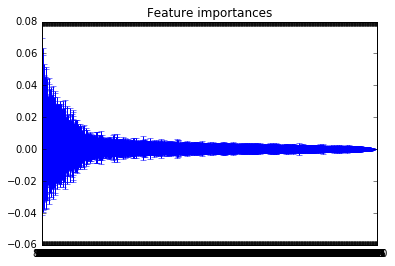

In [27]:
# features analysis
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

X = data_train[features]
Y = data_train['label']

forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [28]:
# normalize feature importances
importances = np.array(importances)
importances /= importances.max()

# select features > 25 % importance
features = [i for i,j in zip(features,importances) if j > 0.25]

# X = data_train[features]
# Y = data_train['label']

print ("Selected number of features: %d" % len(features))

for f in range(len(features)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Selected number of features: 53
1. feature 865 (1.000000)
2. feature 954 (0.840137)
3. feature 702 (0.730828)
4. feature 953 (0.648050)
5. feature 717 (0.622904)
6. feature 703 (0.568463)
7. feature 262 (0.564464)
8. feature 864 (0.526289)
9. feature 102 (0.501794)
10. feature 881 (0.499622)
11. feature 863 (0.495815)
12. feature 282 (0.487879)
13. feature 106 (0.486601)
14. feature 352 (0.483800)
15. feature 869 (0.481697)
16. feature 883 (0.469477)
17. feature 972 (0.433825)
18. feature 97 (0.426738)
19. feature 868 (0.419466)
20. feature 96 (0.392817)
21. feature 112 (0.391609)
22. feature 718 (0.386165)
23. feature 867 (0.370202)
24. feature 878 (0.362777)
25. feature 276 (0.362282)
26. feature 98 (0.360136)
27. feature 707 (0.358730)
28. feature 281 (0.356992)
29. feature 706 (0.354193)
30. feature 716 (0.354039)
31. feature 963 (0.352903)
32. feature 266 (0.334583)
33. feature 107 (0.330265)
34. feature 871 (0.318792)
35. feature 104 (0.308806)
36. feature 280 (0.307432)
37. feat

In [32]:
from sklearn.utils import shuffle
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.cross_validation import train_test_split
from sklearn import metrics, svm, neighbors, linear_model, tree
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier

In [30]:
# setting data for training
X = data_train[features] # data for training
Y = data_train['label'] # target labels
groups = data_train['subj_id']

In [35]:
# Different models to try
#       Model name ---------------------------------------------------------------------
#      Parameters ------------------------------------------                           |
#     Classifier -----------                               |                           |
#                          |                               |                           |
#                          v                               v                           |
models = [[tree.DecisionTreeClassifier(), {'min_samples_split': [2, 4, 6, 8, 10],# |
                                           'min_samples_leaf': [1, 5, 10, 15, 20],#  v
                                           'max_depth': [5, 10, 20, 30, 40, 50, 100]}, "Decision Tree"]
          ]

models.append([svm.LinearSVC(class_weight='balanced'), { 
#                            'gamma': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5], 
                           'C': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5, 1e+6, 1e+7, 1e+8, 1e+9, 1e+10, 1e+11, 1e+12, 1e+13, 1e+14]}, "Support Vector Machines"])

models.append([neighbors.KNeighborsClassifier(), {'n_neighbors': [1, 5, 10, 15, 20, 30, 50]}, "K-Nearest Neighbors"])

models.append([linear_model.LogisticRegression(), {'C': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5, 1e+6]}, "Ridge Logistic Regression"])

models.append([linear_model.LogisticRegression(penalty='l1'), {'C': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5, 1e+6]}, "Lasso Logistic Regression"])

models.append([ RandomForestClassifier(), {'n_estimators': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200],
#                                           'max_depth': [5, 10, 20, 30, 50],
#                                           'min_samples_leaf': [1, 3, 5, 7, 10, 20, 50],
#                                           'min_samples_split': [1, 3, 5, 7, 10]
                                          }, "Random Forest"])

models_with_best_params = []

# Leave One Group Out
logo = LeaveOneGroupOut()
cv = logo.get_n_splits(X,Y,groups)

for model in models:
    clf = GridSearchCV(model[0], model[1], cv=cv)
    clf.fit(X, Y)
    best_params = clf.best_params_
    best_estimator = clf.best_estimator_
    
    model_with_best_params = [best_estimator, best_params, model[2]]
    
    models_with_best_params.append(model_with_best_params)

    print(model[2], ": ")
    print("Best score for ", model[2], ":", clf.best_score_)
    print()
    print("Best parameters for ", model[2], " set found on development set:", best_params)
    print()
    print("Best estimator for ", model[2], " model:", best_estimator)
# print(clf_tree.best_params_)
# print()
# print("Grid scores on development set:")
# print()
# for params, mean_score, scores in clf_tree.grid_scores_:
#     print("%0.3f (+/-%0.03f) for %r"
#           % (mean_score, scores.std() * 2, params))
    print()

print(models_with_best_params)


Decision Tree : 
Best score for  Decision Tree : 0.7945205479452054

Best parameters for  Decision Tree  set found on development set: {'min_samples_leaf': 5, 'max_depth': 5, 'min_samples_split': 2}

Best estimator for  Decision Tree  model: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Support Vector Machines : 
Best score for  Support Vector Machines : 0.7602739726027398

Best parameters for  Support Vector Machines  set found on development set: {'C': 1000000.0}

Best estimator for  Support Vector Machines  model: LinearSVC(C=1000000.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
  

In [36]:
#fitting models to test_data
for model in models_with_best_params:
    classifier = model[0]
    classifier.fit(X, Y)
    score = classifier.score(data_test[features], data_test['label'])
    print("Prediction accuracy for", model[2], "model is", score)
    expected = data_test['label']
    predicted = classifier.predict(data_test[features])

    print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
    print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Prediction accuracy for Decision Tree model is 0.708333333333
Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'):
             precision    recall  f1-score   support

        1.0       0.50      0.33      0.40         6
        2.0       0.55      1.00      0.71         6
        3.0       1.00      0.75      0.86        12

avg / total       0.76      0.71      0.71        24


Confusion matrix:
[[2 4 0]
 [0 6 0]
 [2 1 9]]
Prediction accuracy for Support Vector Machines model is 0.708333333333
Classification report for classifier LinearSVC(C=1000000.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', p